#IMPORT MODULE DAN DATA

In [ ]:
# Melakukan Import module numpy, pandas, dan seaborn
import numpy as np # Untuk perhitungan yang berkaitan dengan matematika
import pandas as pd # Untuk read csv dan processing data pada dataframe
import seaborn as sns # Untuk membuat grafik dari data yang telah diproses
import matplotlib.pyplot as plt #Untuk memudahkan ploting
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

from scipy import stats # Untuk mempermudah perhitungan statistika
from datetime import * # Untuk memudahkan partisi pada time

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
meta = pd.read_csv("/content/building_metadata.csv") #Data Gedung
wtrain = pd.read_csv("/content/weather_train.csv") #Data Cuaca
train = pd.read_csv("/content/train.csv") #Data Energi

#INFORMASI DATA

In [ ]:
#Melihat data meta sekilas
meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
#Melihat data wtrain sekilas
wtrain.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
#Melihat data train sekilas
train

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
...,...,...,...,...
12548520,677,0,2016-08-17 12:00:00,10.6
12548521,678,0,2016-08-17 12:00:00,99.9
12548522,679,0,2016-08-17 12:00:00,26.8
12548523,680,0,2016-08-17 12:00:00,5.4


In [ ]:
#Informasi data meta, wtrain, dan train sekilas
meta.info()
wtrain.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-

#Pre-processing

In [ ]:
#Menggabungkan data meta dengan train sesuai dengan urutan building_id
df = pd.merge(meta, train, on = 'building_id')
df

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.000
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.000
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.000
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.000
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.000
...,...,...,...,...,...,...,...,...,...
12548520,15,1448,Office,92271,2001.0,NaN,0,2016-08-17 07:00:00,3.425
12548521,15,1448,Office,92271,2001.0,NaN,0,2016-08-17 08:00:00,4.375
12548522,15,1448,Office,92271,2001.0,NaN,0,2016-08-17 09:00:00,4.125
12548523,15,1448,Office,92271,2001.0,NaN,0,2016-08-17 10:00:00,4.300


In [ ]:
#Membuang kolom yang tidak diperlukan
df= df.drop(['site_id', 'primary_use', 'square_feet', 'floor_count', 'year_built'], axis=1)
df

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,0,0,2016-01-01 01:00:00,0.000
2,0,0,2016-01-01 02:00:00,0.000
3,0,0,2016-01-01 03:00:00,0.000
4,0,0,2016-01-01 04:00:00,0.000
...,...,...,...,...
12548520,1448,0,2016-08-17 07:00:00,3.425
12548521,1448,0,2016-08-17 08:00:00,4.375
12548522,1448,0,2016-08-17 09:00:00,4.125
12548523,1448,0,2016-08-17 10:00:00,4.300


In [ ]:
#Menyaring agar data yang digunakan hanyalah data dengan building_id 10-40
df = df[(df['building_id'] >= 10) & (df['building_id'] <= 40)]
df

,building_id,meter,timestamp,meter_reading
63258,10,0,2016-01-01 00:00:00,0.000
63259,10,0,2016-01-01 01:00:00,0.000
63260,10,0,2016-01-01 02:00:00,0.000
63261,10,0,2016-01-01 03:00:00,0.000
63262,10,0,2016-01-01 04:00:00,0.000
...,...,...,...,...
256228,40,0,2016-08-17 08:00:00,318.073
256229,40,0,2016-08-17 09:00:00,376.773
256230,40,0,2016-08-17 10:00:00,370.630
256231,40,0,2016-08-17 11:00:00,345.375


In [ ]:
#Cek banyak missing value
df_missing = df.isnull().sum()
df_missing

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

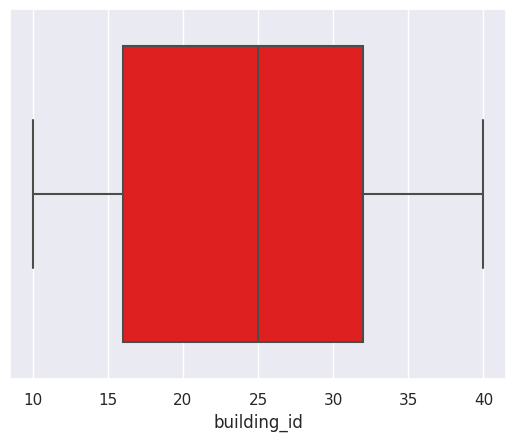

In [ ]:
# Deteksi Outlier dengan boxplot

sns.boxplot(x=df['building_id'],color='red')
plt.show()

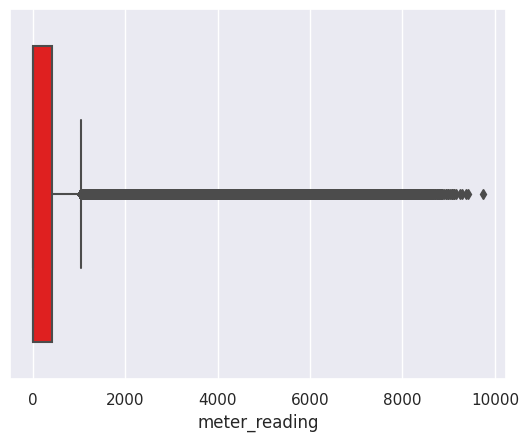

In [ ]:
sns.boxplot(x=df['meter_reading'],color='red')
plt.show()

In [ ]:
#Mengubah tipe data timestamp menjadi tipe data datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,building_id,meter,timestamp,meter_reading
63258,10,0,2016-01-01 00:00:00,0.000
63259,10,0,2016-01-01 01:00:00,0.000
63260,10,0,2016-01-01 02:00:00,0.000
63261,10,0,2016-01-01 03:00:00,0.000
63262,10,0,2016-01-01 04:00:00,0.000
...,...,...,...,...
256228,40,0,2016-08-17 08:00:00,318.073
256229,40,0,2016-08-17 09:00:00,376.773
256230,40,0,2016-08-17 10:00:00,370.630
256231,40,0,2016-08-17 11:00:00,345.375


In [ ]:
#Memastikan kembali bahwa tipe data time stamp merupakan datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192975 entries, 63258 to 256232
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   building_id    192975 non-null  int64         
 1   meter          192975 non-null  int64         
 2   timestamp      192975 non-null  datetime64[ns]
 3   meter_reading  192975 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 7.4 MB


In [ ]:
#Menambahkan kolom yang berasal dari time stamp
def add_timestamp_features(data):
    pd.options.mode.chained_assignment = None

    data['tahun'] = data['timestamp'].dt.year #Menambahkan tahun
    data['bulan'] = data['timestamp'].dt.month #Menambahkan bulan
    data['tanggal'] = data['timestamp'].dt.day #Menambahkan tanggal
    data['jam'] = data['timestamp'].dt.hour #Menampilkan waktu (jam)
    data['hari_ke'] = data['timestamp'].dt.dayofweek #Menampilkan hari dalam banyaknya waktu

#Menambahkan fitur hari libur pada hari ke 5 (sabtu) dan hari ke 6 (minggu)
#Apabila hari_ke merupakan data ke 5 atau 6 akan mengeluarkan output 1 yaitu hari libur
#Apabila hari_ke bukan data ke 5 atau 6 maka akan mengeluarkan output 0 yang bukan hari libur
    conditions = [(data['hari_ke'].eq(5) | data['hari_ke'].eq(6))]
    choices = [1]
    data['hari_libur'] = np.select(conditions, choices, default=0)
    return data

df = add_timestamp_features(df)
df

,building_id,meter,timestamp,meter_reading,tahun,bulan,tanggal,jam,hari_ke,hari_libur
63258,10,0,2016-01-01 00:00:00,0.000,2016,1,1,0,4,0
63259,10,0,2016-01-01 01:00:00,0.000,2016,1,1,1,4,0
63260,10,0,2016-01-01 02:00:00,0.000,2016,1,1,2,4,0
63261,10,0,2016-01-01 03:00:00,0.000,2016,1,1,3,4,0
63262,10,0,2016-01-01 04:00:00,0.000,2016,1,1,4,4,0
...,...,...,...,...,...,...,...,...,...,...
256228,40,0,2016-08-17 08:00:00,318.073,2016,8,17,8,2,0
256229,40,0,2016-08-17 09:00:00,376.773,2016,8,17,9,2,0
256230,40,0,2016-08-17 10:00:00,370.630,2016,8,17,10,2,0
256231,40,0,2016-08-17 11:00:00,345.375,2016,8,17,11,2,0


##ANALISIS

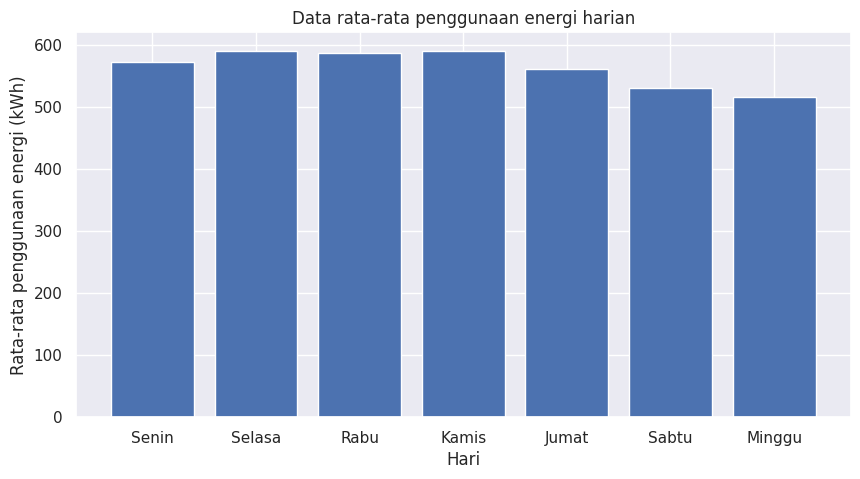

In [ ]:
#Membuat isi dari variabel hari perminggunya
hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

#Fungsi plot rata-rata meter_reading yang di groupkan per variabel hari_ke
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plot_data = df.groupby('hari_ke')['meter_reading'].mean()
ax.bar(plot_data.index, plot_data.values)

#Mengatur sumbu x
ax.set_xticks(range(len(hari)))
ax.set_xticklabels(hari)

#Mengatur nama sumbu x, sumbu y, dan jubudlnya
ax.set_xlabel('Hari')
ax.set_ylabel('Rata-rata penggunaan energi (kWh)')
ax.set_title('Data rata-rata penggunaan energi harian')

plt.show()

In [ ]:
#Menjumlahkan semua data meter_reading yang dikelompokan perhari dan dibagi lagi per bulannya
import calendar
all_month_year_df = pd.pivot_table(df, values="meter_reading",
                                   index=["bulan"],
                                   columns=["hari_ke"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df.head()

hari_ke,0,1,2,3,4,5,6,All
Jan,0.182692,0.245864,0.202759,0.618110,0.457197,0.458836,0.510107,0.391452
Feb,54.984605,0.447101,0.641014,0.793121,0.698771,1.023811,0.517276,10.241390
Mar,398.060102,389.760453,411.880490,436.731460,378.274369,375.373778,388.723191,398.503587
Apr,378.379552,389.480681,410.188264,450.834133,475.999173,411.947528,311.022338,406.701820
May,649.527616,694.208735,599.359835,573.737552,584.985581,631.846080,596.215495,621.310691


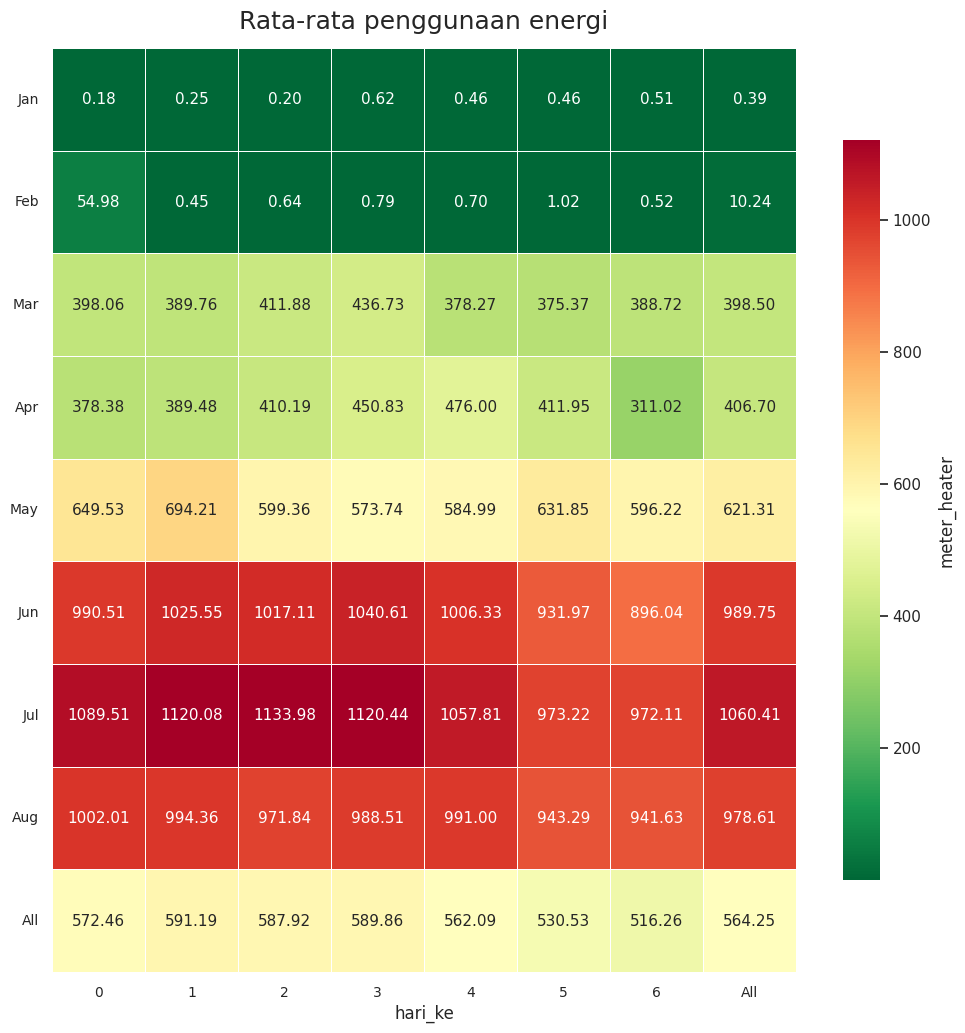

In [ ]:
#heat map rata-rata penggunaan energi perhari yang dibagi setiap bulan pada tahun 2016
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f',
                 annot=True, linewidths=.5, annot_kws={'size':11},
                 cbar_kws={'shrink':.8, 'label':'meter_heater'}, ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Rata-rata penggunaan energi', fontdict={'fontsize':18},    pad=14);

plt.show()